In [1]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': [1.9, 1, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 10, 10,
                         11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20],
                   'y': [3, 5, 6, 10, 13, 15, 17, 14, 20, 23, 25, 27, 30, 30, 31,
                         33, 32, 32, 30, 32, 34, 34, 37, 35, 34, 36, 34, 37, 38, 36]})

#view first five rows of DataFrame
df.head()

,x,y
0,1.9,3
1,1.0,5
2,2.0,6
3,3.0,10
4,4.0,13


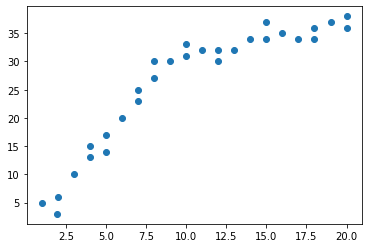

In [2]:
import matplotlib.pyplot as plt

#create scatterplot
plt.plot(df.x, df.y, 'o')

In [3]:
!pip install chowtest

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached chowtest-0.1.4-py3-none-any.whl (4.8 kB)
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-8l_zavr2/sklearn_04af155f7c56403eb793079f0502db45/setup.py", line 109, in <module>
          version="0.0.post1",
        File "/home/ana/anaconda3/lib/python3.7/site-packages/setuptools/__init__.py", line 87, in setup
          return distutils.core.setup(**attrs)
        File "/home/ana/anaconda3/lib/python3.7/site-packages/setuptools/_distutils/core.py", line 147, in setup
          _setup_distribution = dist = klass(attrs)
        File "/home/ana/anaconda3/lib/python

In [6]:
from chow_test import chowtest

ModuleNotFoundError: No module named 'chow_test'

In [ ]:
type(df.iloc[:]['y'])

pandas.core.series.Series

In [ ]:
chow_test(y_series=df.iloc[:]['y'], X_series=df.iloc[:]['x'],
         last_index=15,
         first_index=16,
         significance=.05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 97.34688099157955, P_value: 1.5905055050779993e-12


(97.34688099157955, 1.5905055050779993e-12)

In [ ]:
oi[1]

1.5905055050779993e-12

In [1]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import LinearAxis, Range1d
import pandas as pd

import pandas as pd
import numpy as np
import os
import sys
sys.path.append('./data_analysis')

if 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'trips/analysis/'
destination_folder_path = data_folder + 'charts/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')

trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')

from modules.DataPreparation import DataPreparation
dp = DataPreparation()

covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)

trips = dp.transform_to_datetime(trips, ['date'])
trips = dp.transform_to_time_series(trips, 'date', drop = False)

trips_and_covid = pd.merge(trips, covid_data, left_index=True,
                            right_index=True, how = 'left')

trips_and_covid['date_trips'] = trips_and_covid.index

In [58]:
trips['date']

date
2018-01-01   2018-01-01
2018-02-01   2018-02-01
2018-03-01   2018-03-01
2018-04-01   2018-04-01
2018-05-01   2018-05-01
2018-06-01   2018-06-01
2018-07-01   2018-07-01
2018-08-01   2018-08-01
2018-09-01   2018-09-01
2018-10-01   2018-10-01
2018-11-01   2018-11-01
2018-12-01   2018-12-01
2019-01-01   2019-01-01
2019-02-01   2019-02-01
2019-03-01   2019-03-01
2019-04-01   2019-04-01
2019-05-01   2019-05-01
2019-06-01   2019-06-01
2019-07-01   2019-07-01
2019-08-01   2019-08-01
2019-09-01   2019-09-01
2019-10-01   2019-10-01
2019-11-01   2019-11-01
2019-12-01   2019-12-01
2020-01-01   2020-01-01
2020-02-01   2020-02-01
2020-03-01   2020-03-01
2020-04-01   2020-04-01
2020-05-01   2020-05-01
2020-06-01   2020-06-01
2020-07-01   2020-07-01
2020-08-01   2020-08-01
2020-09-01   2020-09-01
2020-10-01   2020-10-01
2020-11-01   2020-11-01
2020-12-01   2020-12-01
2021-01-01   2021-01-01
2021-02-01   2021-02-01
2021-03-01   2021-03-01
2021-04-01   2021-04-01
2021-05-01   2021-05-01
2021-06-01 

In [8]:
trips

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
date,,,,,,,,
2018-01-01,57.000000,3585.398001,15.247060,NaN,1102.535977,3.000000,0.333333,0.000000
2018-02-01,476.571429,2237.209127,13.638006,NaN,1925.366525,3.000000,0.285714,0.071429
2018-03-01,802.870968,2569.867173,13.008217,NaN,2126.458294,3.096774,0.290323,0.032258
2018-04-01,1079.533333,2024.101274,13.361577,NaN,2217.028254,3.000000,0.300000,0.066667
2018-05-01,2215.967742,1975.162249,13.470241,NaN,2465.867782,2.903226,0.258065,0.064516
2018-06-01,3083.600000,2101.515148,13.626468,NaN,2581.189216,3.100000,0.300000,0.000000
2018-07-01,3614.419355,2293.300753,13.576444,NaN,2574.461926,2.935484,0.290323,0.032258
2018-08-01,4430.935484,2766.196377,13.593908,NaN,2623.031810,3.000000,0.258065,0.000000
2018-09-01,5383.333333,2135.990251,13.643139,NaN,2548.219276,3.166667,0.333333,0.033333


In [9]:
!pip install statsmodels

Keyring is skipped due to an exception: 'keyring.backends'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def find_best_ploy_fit(trips, variable, poly_degree = 1, period = '', filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))
    x1 = df.loc[:'2020-03-24','range']
    y1 = df.loc[:'2020-03-24', variable]

    x2 = df.loc['2020-03-24':,'range']
    y2 = df.loc['2020-03-24':, variable]

    # x3 = df.loc['2021-11':,'range']
    # y3 = df.loc['2021-11':, variable]

    index = [i for i in range(len(df))]

    coeffs1 = np.polyfit(x1, y1, poly_degree)
    print()
    poly_eqn = np.poly1d(coeffs1)
    y_hat1 = poly_eqn(x1)

    coeffs2 = np.polyfit(x2, y2, poly_degree)
    poly_eqn = np.poly1d(coeffs2)
    y_hat2 = poly_eqn(x2)

    # coeffs = np.polyfit(x3, y3, poly_degree)
    # poly_eqn = np.poly1d(coeffs)
    # y_hat3 = poly_eqn(x3)

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    # y_hat1 = np.pad(y_hat1, (None,len(index) - len(y_hat1)))
    y_hat1 = np.concatenate((y_hat1,[None]*(len(df.index) - len(y_hat1))))
    y_hat2 = np.concatenate(([None]*(len(df.index) - len(y_hat2)), y_hat2))
    # y_hat2 = np.concatenate(([None]*(len(x1)), y_hat2, [None]*(len(x3))))
    # y_hat3 = np.concatenate(([None]*(len(df.index) - len(y_hat3)), y_hat3))
    plt.plot(df.index,y_hat1)
    plt.plot(df.index,y_hat2)
    # plt.plot(df.index,y_hat3)
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Início da quarentena')

    title = 'Monthly variation of variable {variable}'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=22, pad = 10)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return coeffs1,coeffs2

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

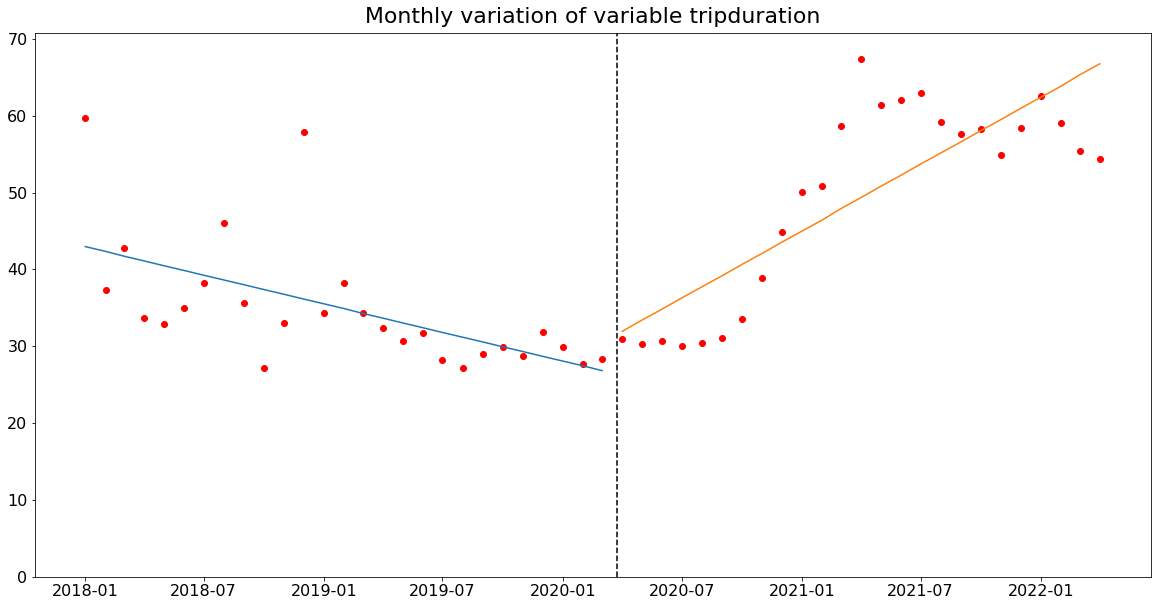

In [ ]:
variable = 'tripduration'
coeffs = find_best_ploy_fit(trips, variable, 1, 'Before Covid for ', 'before', False)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def find_best_ploy_fit_trip_duration(trips, variable, poly_degree = 1, filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    df['tripduration_min'] = df['tripduration'].apply(lambda x : x/60)
    variable = 'tripduration_min'
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))
    x1 = df.loc[:'2020-8','range']
    y1 = df.loc[:'2020-8', variable]

    x2 = df.loc['2020-9':'2021-4','range']
    y2 = df.loc['2020-9':'2021-4', variable]

    x3 = df.loc['2021-5':,'range']
    y3 = df.loc['2021-5':, variable]

    coeffs1 = np.polyfit(x1, y1, poly_degree)
    print()
    poly_eqn = np.poly1d(coeffs1)
    y_hat1 = poly_eqn(x1)

    coeffs2 = np.polyfit(x2, y2, poly_degree)
    poly_eqn = np.poly1d(coeffs2)
    y_hat2 = poly_eqn(x2)

    coeffs3 = np.polyfit(x3, y3, poly_degree)
    poly_eqn = np.poly1d(coeffs3)
    y_hat3 = poly_eqn(x3)

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    # y_hat1 = np.pad(y_hat1, (None,len(index) - len(y_hat1)))
    y_hat1 = np.concatenate((y_hat1,[None]*(len(df.index) - len(y_hat1))))
    # y_hat2 = np.concatenate(([None]*(len(df.index) - len(y_hat2)), y_hat2))
    y_hat2 = np.concatenate(([None]*(len(x1)), y_hat2, [None]*(len(x3))))
    y_hat3 = np.concatenate(([None]*(len(df.index) - len(y_hat3)), y_hat3))
    plt.plot(df.index,y_hat1)
    plt.plot(df.index,y_hat2)
    plt.plot(df.index,y_hat3)
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Lockdown in SP (2020-03-24)')
    # ax.axvline(pd.to_datetime('2020-09-01'), color="black", linestyle="--",  label='Criação plano profissional')
    # ax.axvline(pd.to_datetime('2021-05-01'), color="black", linestyle="--",  label='Criação plano profissional')

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    ax.set_xlabel('Date', color='k', fontsize=22, labelpad = 10)
    ax.set_ylabel('Trip duration (min)', color='k', fontsize=22, labelpad = 10)

    title = 'Average trip duration'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=28, pad = 15)
    # ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax.legend(loc = 'lower right',fontsize = 22)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return coeffs1,coeffs2, coeffs3

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

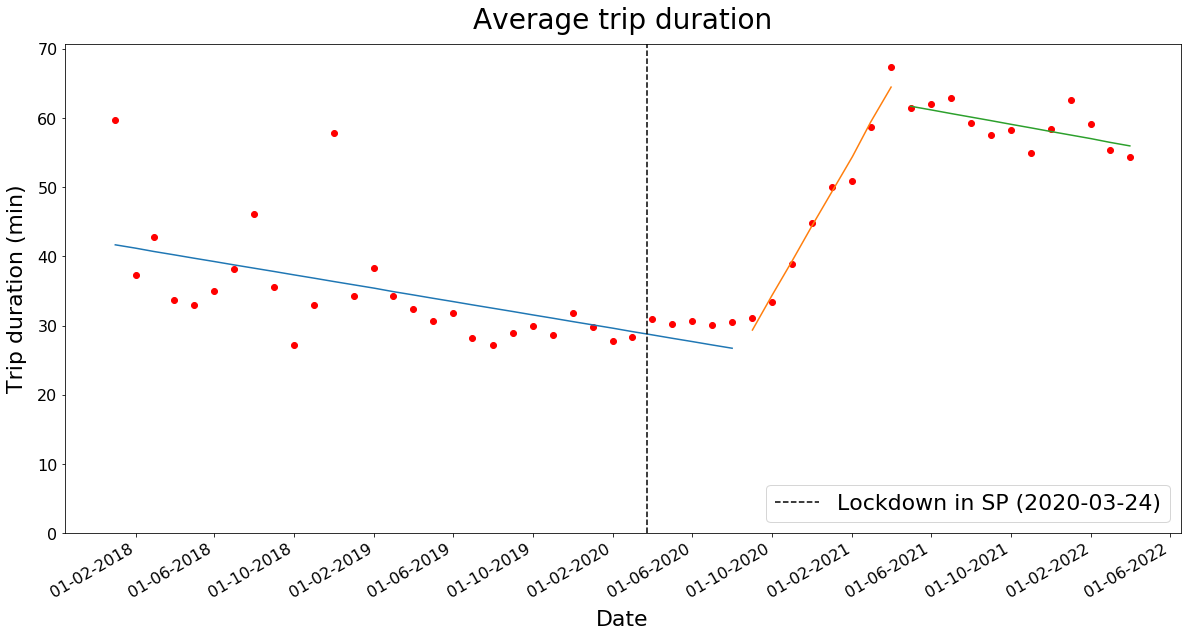

In [7]:
variable = 'tripduration'
coeffs = find_best_ploy_fit_trip_duration(trips, variable, 1, 'before', False)

In [ ]:
coeffs

(array([-0.48200706, 41.68125368]),
 array([   5.01427583, -131.08857922]),
 array([-0.52046819, 82.5186838 ]))

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_trip_duration(trips, variable, poly_degree = 1, filename = '', save = True):
    plt.clf()
    plt.figure(figsize =(12, 8))
    # df = trips.loc['2019':]
    df = trips
    df['tripduration_min'] = df['tripduration'].apply(lambda x : x/60)
    variable = 'tripduration_min'
    # df = trips.reset_index(drop=True)
    df['range'] = list(range(len(df)))

    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)

    ax.plot(df.index, df.loc[:, variable], 'ro')
    plt.ylim(bottom=0)
    plt.ylim(top=trips[variable].max()*1.05)
    # ax.axvline(pd.to_datetime('2020-03-06'), color="black", linestyle="--",  label='Início da quarentena')
    ax.axvline(pd.to_datetime('2020-03-24'), color="black", linestyle="--",  label='Lockdown in SP (2020-03-24)')
    # ax.axvline(pd.to_datetime('2020-09-01'), color="black", linestyle="--",  label='Criação plano profissional')
    # ax.axvline(pd.to_datetime('2021-05-01'), color="black", linestyle="--",  label='Criação plano profissional')

    # set monthly locator
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    # set formatter
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels
    plt.gcf().autofmt_xdate()

    ax.set_xlabel('Date', color='k', fontsize=22, labelpad = 10)
    ax.set_ylabel('Trip duration (min)', color='k', fontsize=22, labelpad = 10)

    title = 'Average trip duration'.format(variable = variable)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    plt.title(title, size=28, pad = 15)
    # ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize = 18)
    ax.legend(loc = 'lower right',fontsize = 22)
    if save:
        filename = variable + '_' + filename + '_' + str(poly_degree) + '.png'
        plt.savefig(destination_folder_path + filename) 
    return 0

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

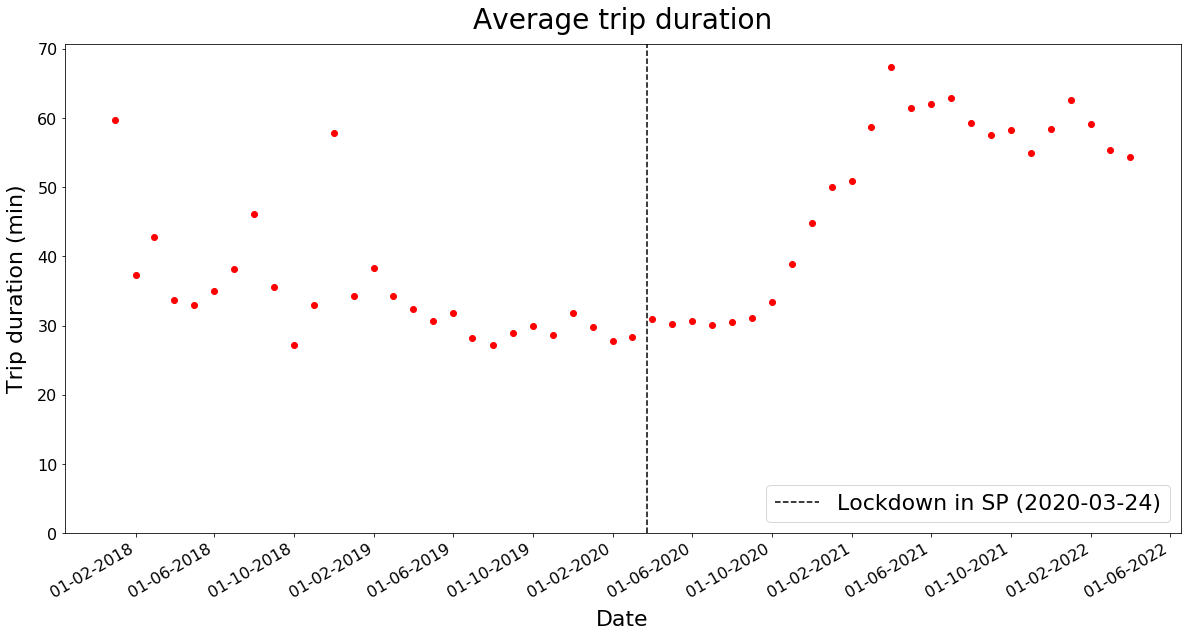

In [9]:
variable = 'tripduration'
coeffs = plot_trip_duration(trips, variable, 1, 'before', False)

In [ ]:
coeffs

(array([-0.48200706, 41.68125368]),
 array([   5.01427583, -131.08857922]),
 array([-0.52046819, 82.5186838 ]))

In [10]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import LinearAxis, Range1d
import pandas as pd

import pandas as pd
import numpy as np
import os
import sys
sys.path.append('./data_analysis')

if 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'trips/analysis/'
destination_folder_path = data_folder + 'charts/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')

trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')

from modules.DataPreparation import DataPreparation
dp = DataPreparation()

covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)

trips_chow = dp.transform_to_datetime(trips, ['date'])

In [16]:
trips = trips.set_index('date', drop = True)
trips['index'] = list(range(len(trips)))
trips

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday,index
date,,,,,,,,,
2018-01-01,57.000000,3585.398001,15.247060,NaN,1102.535977,3.000000,0.333333,0.000000,0
2018-02-01,476.571429,2237.209127,13.638006,NaN,1925.366525,3.000000,0.285714,0.071429,1
2018-03-01,802.870968,2569.867173,13.008217,NaN,2126.458294,3.096774,0.290323,0.032258,2
2018-04-01,1079.533333,2024.101274,13.361577,NaN,2217.028254,3.000000,0.300000,0.066667,3
2018-05-01,2215.967742,1975.162249,13.470241,NaN,2465.867782,2.903226,0.258065,0.064516,4
2018-06-01,3083.600000,2101.515148,13.626468,NaN,2581.189216,3.100000,0.300000,0.000000,5
2018-07-01,3614.419355,2293.300753,13.576444,NaN,2574.461926,2.935484,0.290323,0.032258,6
2018-08-01,4430.935484,2766.196377,13.593908,NaN,2623.031810,3.000000,0.258065,0.000000,7
2018-09-01,5383.333333,2135.990251,13.643139,NaN,2548.219276,3.166667,0.333333,0.033333,8


In [25]:
!pip install linearmodels

Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 5.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15


In [27]:
from linearmodels.datasets import meps
import statsmodels.api as sm
import pandas as pd
data = meps.load()
data = data.dropna()
data = sm.add_constant(data)
y = data.income
X = data.drop('income',axis=1)
X_b = X[X.black==1].drop('black',axis=1)
y_b = data.income[X.black==1]
X_nb = X[X.black==0].drop('black',axis=1)
y_nb = data.income[X.black==0]

In [30]:
X.shape

(10089, 29)

In [43]:
y = trips.tripduration
X = trips['index']
X_b = X[:'2021-09-01']
y_b = y[:'2021-09-01']
X_nb = X['2021-09-02':]
y_nb = y['2021-09-02':]

In [44]:
J = 1
k = 1
N1 = X_b.shape[0]
N2 = X_nb.shape[0]

In [34]:
y_b

date
2018-01-01    3585.398001
2018-02-01    2237.209127
2018-03-01    2569.867173
2018-04-01    2024.101274
2018-05-01    1975.162249
2018-06-01    2101.515148
2018-07-01    2293.300753
2018-08-01    2766.196377
2018-09-01    2135.990251
2018-10-01    1631.979458
2018-11-01    1978.760698
2018-12-01    3470.338193
2019-01-01    2060.186448
2019-02-01    2297.233179
2019-03-01    2059.076626
2019-04-01    1944.900563
2019-05-01    1843.465859
2019-06-01    1905.679334
2019-07-01    1693.558292
2019-08-01    1628.950412
2019-09-01    1740.652836
2019-10-01    1796.326887
2019-11-01    1722.588382
2019-12-01    1911.624855
2020-01-01    1792.484978
2020-02-01    1664.650080
2020-03-01    1703.564246
2020-04-01    1857.467596
2020-05-01    1817.646573
2020-06-01    1842.382151
2020-07-01    1803.096096
2020-08-01    1828.122869
2020-09-01    1866.475558
2020-10-01    2009.330596
2020-11-01    2333.952735
2020-12-01    2688.456632
2021-01-01    3003.339638
2021-02-01    3054.650290
2021-03

In [36]:
X_nb

date
2021-10-01    45
2021-11-01    46
2021-12-01    47
2022-01-01    48
2022-02-01    49
2022-03-01    50
2022-04-01    51
Name: index, dtype: int64

In [41]:
y_nb

date
2021-09-01    3455.039560
2021-10-01    3492.441402
2021-11-01    3292.638223
2021-12-01    3503.159021
2022-01-01    3755.116782
2022-02-01    3543.941367
2022-03-01    3321.339139
2022-04-01    3262.739006
Name: tripduration, dtype: float64

In [42]:
X_nb

date
2021-10-01    45
2021-11-01    46
2021-12-01    47
2022-01-01    48
2022-02-01    49
2022-03-01    50
2022-04-01    51
Name: index, dtype: int64

In [45]:
import statsmodels.api as sm
model_dummy = sm.OLS(y,X).fit()
RSSd = model_dummy.ssr
model_b = sm.OLS(y_b,X_b).fit()
RSSb = model_b.ssr
model_nb = sm.OLS(y_nb,X_nb).fit()
RSSnb = model_nb.ssr

In [46]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))

In [47]:
import scipy
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.7963118986983263

In [ ]:
!pip install chowtest

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached chowtest-0.1.4-py3-none-any.whl (4.8 kB)
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-yh15dok8/sklearn_d8ccae5425e04600ac991b469a0d3d67/setup.py", line 109, in <module>
          version="0.0.post1",
        File "/home/ana/anaconda3/lib/python3.7/site-packages/setuptools/__init__.py", line 87, in setup
          return distutils.core.setup(**attrs)
        File "/home/ana/anaconda3/lib/python3.7/site-packages/setuptools/_distutils/core.py", line 147, in setup
          _setup_distribution = dist = klass(attrs)
        File "/home/ana/anaconda3/lib/python

In [50]:
trips

,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday,index
date,,,,,,,,,
2018-01-01,57.000000,3585.398001,15.247060,NaN,1102.535977,3.000000,0.333333,0.000000,0
2018-02-01,476.571429,2237.209127,13.638006,NaN,1925.366525,3.000000,0.285714,0.071429,1
2018-03-01,802.870968,2569.867173,13.008217,NaN,2126.458294,3.096774,0.290323,0.032258,2
2018-04-01,1079.533333,2024.101274,13.361577,NaN,2217.028254,3.000000,0.300000,0.066667,3
2018-05-01,2215.967742,1975.162249,13.470241,NaN,2465.867782,2.903226,0.258065,0.064516,4
2018-06-01,3083.600000,2101.515148,13.626468,NaN,2581.189216,3.100000,0.300000,0.000000,5
2018-07-01,3614.419355,2293.300753,13.576444,NaN,2574.461926,2.935484,0.290323,0.032258,6
2018-08-01,4430.935484,2766.196377,13.593908,NaN,2623.031810,3.000000,0.258065,0.000000,7
2018-09-01,5383.333333,2135.990251,13.643139,NaN,2548.219276,3.166667,0.333333,0.033333,8


In [49]:
from chow_test import Chowtest

ImportError: cannot import name 'chowtest' from 'chow_test' (/home/ana/Documents/ic/bss-analysis/data_analysis/chow_test.py)

In [ ]:
chow_test(y_series=pd.Series(trips_chow['tripduration']),
            X_series=pd.Series(trips_chow.index),
            last_index=26,
            first_index=27,
            significance=0.05)

NameError: name 'chow_test' is not defined

In [ ]:
trips

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-01,57.000000,3585.398001,15.247060,NaN,1102.535977,3.000000,0.333333,0.000000
1,2018-02-01,476.571429,2237.209127,13.638006,NaN,1925.366525,3.000000,0.285714,0.071429
2,2018-03-01,802.870968,2569.867173,13.008217,NaN,2126.458294,3.096774,0.290323,0.032258
3,2018-04-01,1079.533333,2024.101274,13.361577,NaN,2217.028254,3.000000,0.300000,0.066667
4,2018-05-01,2215.967742,1975.162249,13.470241,NaN,2465.867782,2.903226,0.258065,0.064516
5,2018-06-01,3083.600000,2101.515148,13.626468,NaN,2581.189216,3.100000,0.300000,0.000000
6,2018-07-01,3614.419355,2293.300753,13.576444,NaN,2574.461926,2.935484,0.290323,0.032258
7,2018-08-01,4430.935484,2766.196377,13.593908,NaN,2623.031810,3.000000,0.258065,0.000000
8,2018-09-01,5383.333333,2135.990251,13.643139,NaN,2548.219276,3.166667,0.333333,0.033333
9,2018-10-01,5327.806452,1631.979458,14.087414,NaN,2629.155791,2.806452,0.258065,0.032258


In [ ]:
chow_test(y_series=pd.Series(trips_chow[1:25]['tripduration']),
            X_series=pd.Series(trips_chow[1:25].index),
            last_index=10,
            first_index=11,
            significance=0.05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 17.87087087171322, P_value: 4.30657882156682e-05


(17.87087087171322, 4.30657882156682e-05)

In [ ]:
chow_test(y_series=pd.Series(trips_chow['tripduration']),
            X_series=pd.Series(trips_chow.index),
            last_index=10,
            first_index=11,
            significance=0.05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 10.708048200952758, P_value: 0.00014725831262807354


(10.708048200952758, 0.00014725831262807354)

In [ ]:
trips_chow.loc[26]

date               2020-03-01 00:00:00
number_of_trips                8211.45
tripduration                   1703.56
hour                           14.4967
age                            29.1308
distance                       1927.46
week_day                       2.93548
weekend                       0.290323
holiday                              0
Name: 26, dtype: object

In [ ]:
results_chow = pd.DataFrame(columns = ['break_date','chow_stat', 'p_value'])
for i in range(1, len(trips_chow)-1):
    result_chow = chow_test(y_series=pd.Series(trips_chow['tripduration']),
            X_series=pd.Series(trips_chow.index),
            last_index=i,
            first_index=i+1,
            significance=0.05)
    results_chow = results_chow.append({'break_date' : trips_chow.loc[i]['date'], 'chow_stat' : result_chow[0],  'p_value' : result_chow[1], 'reject': result_chow[1] < 0.05}, ignore_index=True)
results_chow = results_chow.set_index('break_date')

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 5.56751070903727, P_value: 0.00676099316035339
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 7.3142508266865445, P_value: 0.0017156624606833315
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 6.802435006109891, P_value: 0.00254315509021541
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 7.070557243531785, P_value: 0.002067597112447195
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 7.440204828435274, P_value: 0.0015588342111353404
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 8.0986200986739, P_value: 0.0009503728068784856
Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Stat

In [ ]:
results_chow

,chow_stat,p_value,reject
break_date,,,
2018-02-01,5.567511,6.760993e-03,1.0
2018-03-01,7.314251,1.715662e-03,1.0
2018-04-01,6.802435,2.543155e-03,1.0
2018-05-01,7.070557,2.067597e-03,1.0
2018-06-01,7.440205,1.558834e-03,1.0
2018-07-01,8.098620,9.503728e-04,1.0
2018-08-01,10.880320,1.308615e-04,1.0
2018-09-01,10.385214,1.840155e-04,1.0
2018-10-01,10.425756,1.789166e-04,1.0


<AxesSubplot:xlabel='break_date'>

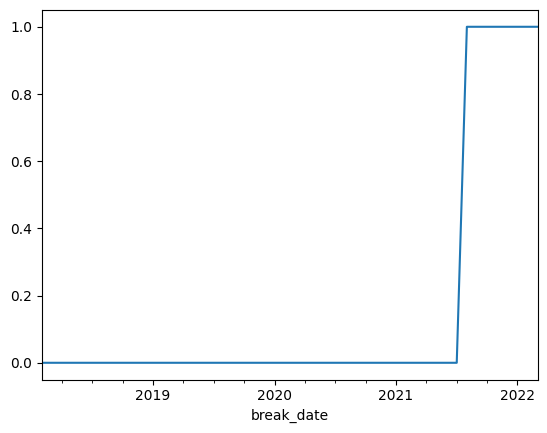

In [ ]:
results_chow['reject'].plot()

<AxesSubplot:xlabel='break_date'>

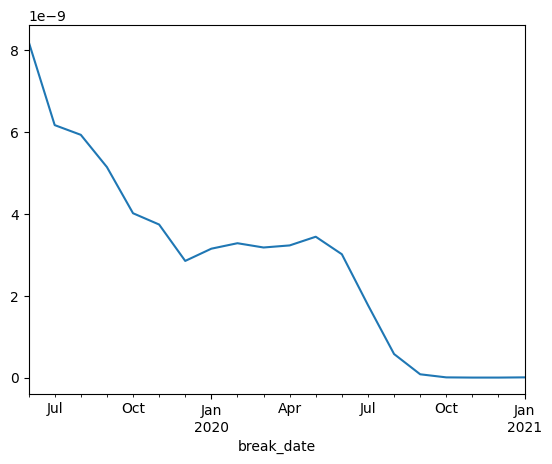

In [ ]:
results_chow['2019-06':'2021-01']['p_value'].plot()

<AxesSubplot:>

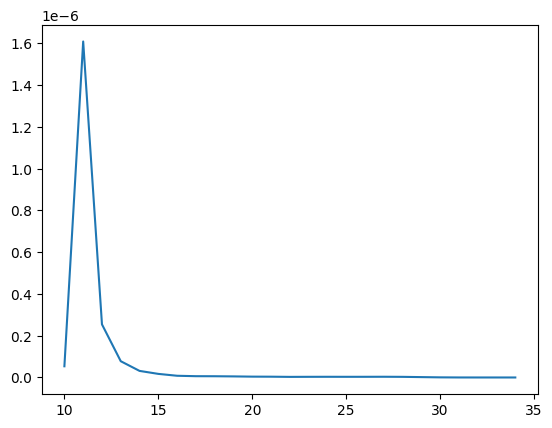

In [ ]:
results_chow[10:35]['p_value'].plot()

In [ ]:
oi = []
oi.append(1)
oi

[1]

In [ ]:
chow_test(y_series=pd.Series(trips_chow[1:25]['tripduration']),
            X_series=pd.Series(trips_chow[1:25].index),
            last_index=11,
            first_index=12,
            significance=0.05)

Fail to reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 1.6518900891987245, P_value: 0.218053813275078


(1.6518900891987245, 0.218053813275078)

In [ ]:
chow_test(y_series=pd.Series(trips_t['tripduration']),
            X_series=pd.Series(trips_t.index),
            last_index=10,
            first_index=11,
            significance=0.05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 10.708048200952758, P_value: 0.00014725831262807354


(10.708048200952758, 0.00014725831262807354)

In [ ]:
trips_t

,date,number_of_trips,tripduration,hour,age,distance,week_day,weekend,holiday
0,2018-01-01,57.000000,3585.398001,15.247060,NaN,1102.535977,3.000000,0.333333,0.000000
1,2018-02-01,476.571429,2237.209127,13.638006,NaN,1925.366525,3.000000,0.285714,0.071429
2,2018-03-01,802.870968,2569.867173,13.008217,NaN,2126.458294,3.096774,0.290323,0.032258
3,2018-04-01,1079.533333,2024.101274,13.361577,NaN,2217.028254,3.000000,0.300000,0.066667
4,2018-05-01,2215.967742,1975.162249,13.470241,NaN,2465.867782,2.903226,0.258065,0.064516
5,2018-06-01,3083.600000,2101.515148,13.626468,NaN,2581.189216,3.100000,0.300000,0.000000
6,2018-07-01,3614.419355,2293.300753,13.576444,NaN,2574.461926,2.935484,0.290323,0.032258
7,2018-08-01,4430.935484,2766.196377,13.593908,NaN,2623.031810,3.000000,0.258065,0.000000
8,2018-09-01,5383.333333,2135.990251,13.643139,NaN,2548.219276,3.166667,0.333333,0.033333
9,2018-10-01,5327.806452,1631.979458,14.087414,NaN,2629.155791,2.806452,0.258065,0.032258


<AxesSubplot:xlabel='date'>

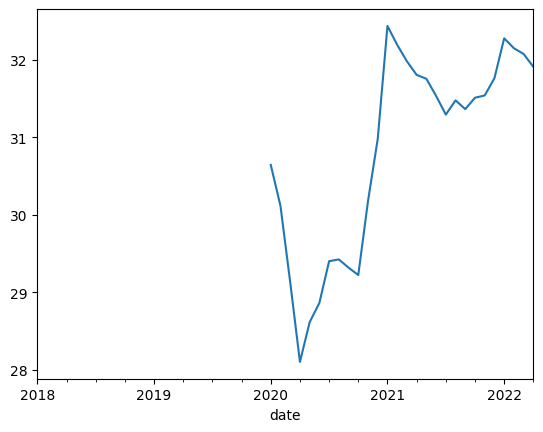

In [ ]:
trips['age'].plot()